# OH-14

In [ ]:
!pip install mglearn

In [1]:
import mglearn
from sklearn.model_selection import train_test_split

In [2]:
X,y = mglearn.datasets.load_extended_boston()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=0)

### Linear regression

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [5]:
lr.score(X_train,y_train)

0.9490240966612833

In [7]:
lr.score(X_test,y_test)

0.6158858584078952

### Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

In [9]:
ridge = Ridge().fit(X_train, y_train)

In [10]:
ridge.score(X_train,y_train)

0.8858089292103581

In [11]:
ridge.score(X_test,y_test)

0.7214499108060963

### Ridge regression with alpha=10

In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training score", ridge10.score(X_train,y_train))
print("Test score", ridge10.score(X_test,y_test))

Training score 0.7934484752213663
Test score 0.5886807784434772


### Ridge regression with alpha=0.1

In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training score", ridge01.score(X_train,y_train))
print("Test score", ridge01.score(X_test,y_test))

Training score 0.9261926604874959
Test score 0.7463824108919255


In [14]:
import matplotlib.pyplot as plt

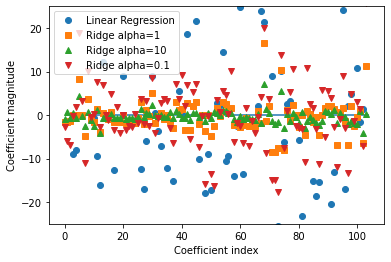

In [15]:
plt.plot(lr.coef_, "o", label="Linear Regression")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

## Bias-Variance trade-off and Cross-Validation

<img height="600" src="bias-variance.png" width="900"/>

Recall that the reason we separate data in training and testing is that we want our models to generalize well to unseen data. That is, we are not only interested in how well a model fits the training data, but what matters most to us is that the models can make predictions for data that were not observed in the training phase. In this notebook we will see one aspect of this evaluation, we will introduce the cross-validation, which is a robust way to ensure the generalization of the models.

### Cross-validation

The cross-validation is a statistical method to evaluate the performance with respect to the generalization of the models, and it is a mandatory step after doing the exclusion method. The most widely used variant of cross-validation is called k-fold cross-validation, where k is a user-specified number commonly between 5 and 10.

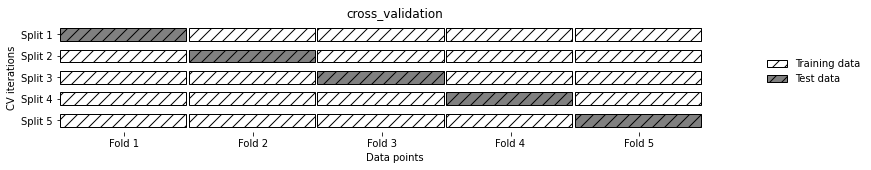

In [15]:
mglearn.plots.plot_cross_validation()

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [17]:
iris = load_iris()

The simplest way to do cross-validation with sklearn is from the `cross_val_score` function, in this case this function receives the model we want to evaluate, the training data and the original target variable.

In [18]:
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)

In [19]:
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [21]:
import numpy as np
np.mean(scores)

0.9733333333333334

#### Example

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2,
                                                    random_state=42)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pipe_logreg = Pipeline([("scaler", StandardScaler()),
                        ("pca", PCA(n_components=2)),
                        ("clf", LogisticRegression(random_state=42))])

In [27]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(random_state=42))])

In [28]:
pipe_logreg.score(X_test, y_test)

0.9912280701754386

In [40]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits=10, shuffle=True,
                        random_state=42).split(X_train,y_train)

In [41]:
scores = []

for k, (train,test) in enumerate(kfold):
    pipe_logreg.fit(X_train[train], y_train[train])
    score = pipe_logreg.score(X_train[test], y_train[test])
    scores.append(score)

    print("Fold #{}, Size:{}, Acc:{}".format(k+1,
                                               np.bincount(y_train[train]),
                                               score))

Fold #1, Size:[152 257], Acc:0.9565217391304348
Fold #2, Size:[152 257], Acc:0.9565217391304348
Fold #3, Size:[152 257], Acc:0.9782608695652174
Fold #4, Size:[152 257], Acc:0.8913043478260869
Fold #5, Size:[152 257], Acc:0.9565217391304348
Fold #6, Size:[153 257], Acc:0.9111111111111111
Fold #7, Size:[152 258], Acc:0.9777777777777777
Fold #8, Size:[152 258], Acc:0.8444444444444444
Fold #9, Size:[152 258], Acc:0.9555555555555556
Fold #10, Size:[152 258], Acc:1.0


In [44]:
print("Mean Acc CV: {} +/- {}".format(np.mean(scores), np.std(scores)))

Mean Acc CV: 0.9428019323671497 +/- 0.04450856538189642
